Ex 3: Transparency in AI Decision-Making

Objective: To compare transparent vs. black-box models.


To compare a transparent model (Decision Tree) and a black-box model (Random Forest) and understand how transparency in AI decision-making affects trust, interpretability, and ethical implications.

In [12]:
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

In [14]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Train Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

DecisionTreeClassifier(max_depth=4): Limits tree depth to 4 (for readability).

.fit(): Trains the tree on training data.

.predict(): Uses the trained model to predict outcomes for test data.

In [16]:
# Train Random Forest
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)

RandomForestClassifier(n_estimators=100): Uses 100 trees in the forest.

More trees → better accuracy, but harder to interpret.

.fit() and .predict() as above.

In [17]:
# Evaluate both models
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_forest = accuracy_score(y_test, y_pred_forest)

In [18]:
print("Decision Tree Accuracy:", acc_tree)
print("Random Forest Accuracy:", acc_forest)

Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9707602339181286


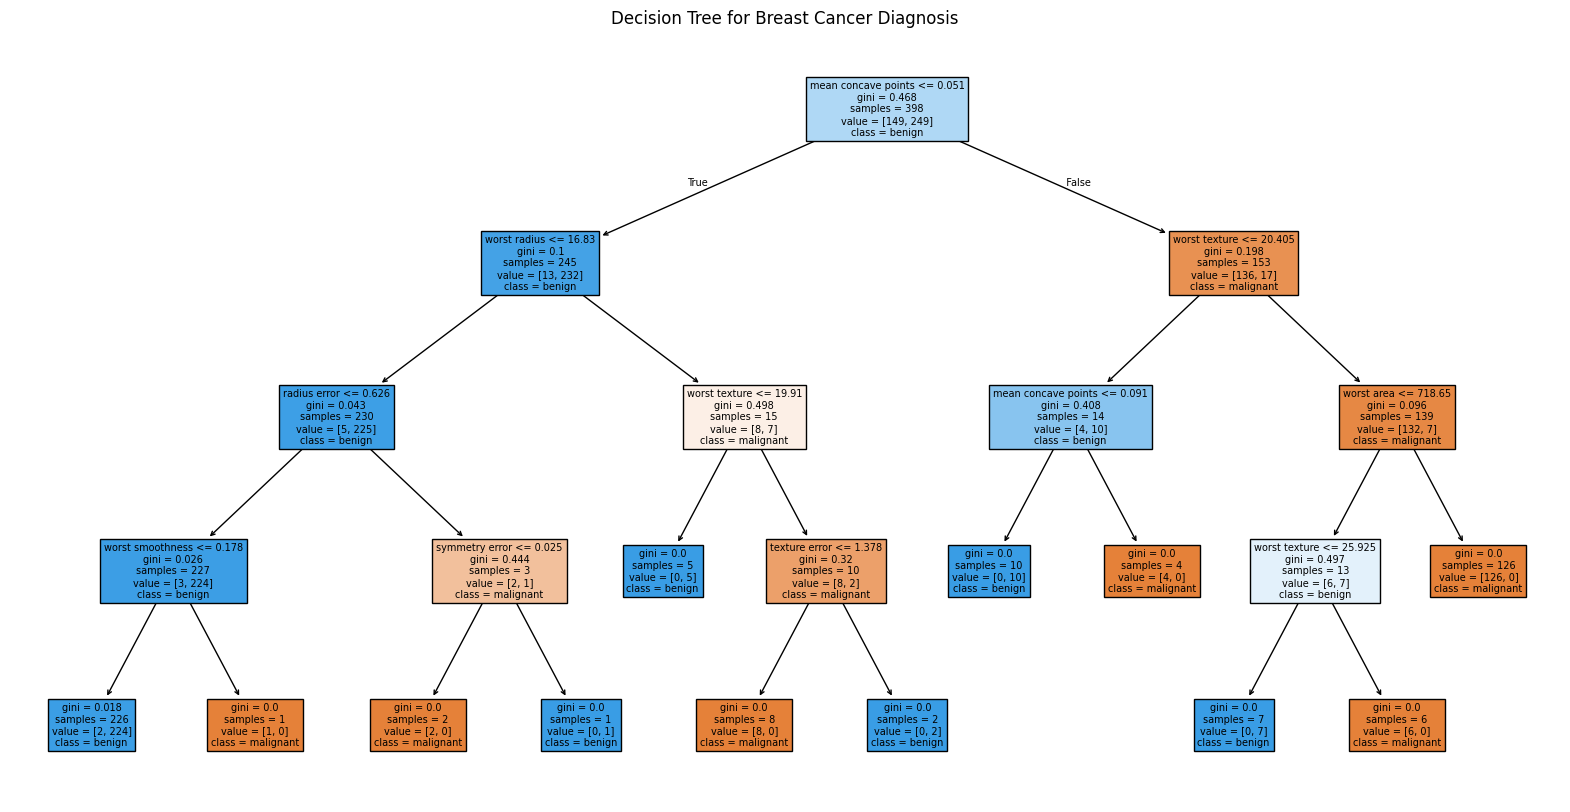

In [8]:
# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree for Breast Cancer Diagnosis")
plt.show()

In [19]:
# Classification report (optional for deeper analysis)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.95      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [20]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_forest))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [21]:
# Feature Importance Analysis
import numpy as np

print("=== INTERPRETABILITY COMPARISON ===")

# Decision Tree Feature Importance (Transparent)
tree_importance = tree.feature_importances_
tree_features = [(data.feature_names[i], importance) for i, importance in enumerate(tree_importance)]
tree_features_sorted = sorted(tree_features, key=lambda x: x[1], reverse=True)

print("\nDecision Tree - Top 5 Most Important Features:")
for i, (feature, importance) in enumerate(tree_features_sorted[:5]):
    print(f"{i+1}. {feature}: {importance:.4f}")

# Random Forest Feature Importance (Black-box aggregate)
forest_importance = forest.feature_importances_
forest_features = [(data.feature_names[i], importance) for i, importance in enumerate(forest_importance)]
forest_features_sorted = sorted(forest_features, key=lambda x: x[1], reverse=True)

print("\nRandom Forest - Top 5 Most Important Features:")
for i, (feature, importance) in enumerate(forest_features_sorted[:5]):
    print(f"{i+1}. {feature}: {importance:.4f}")

# Calculate similarity in feature ranking
tree_top_features = [f[0] for f in tree_features_sorted[:10]]
forest_top_features = [f[0] for f in forest_features_sorted[:10]]
common_features = set(tree_top_features) & set(forest_top_features)

print(f"\nFeature Ranking Similarity:")
print(f"Common features in top 10: {len(common_features)}/10")
print(f"Agreement rate: {len(common_features)/10*100:.1f}%")

=== INTERPRETABILITY COMPARISON ===

Decision Tree - Top 5 Most Important Features:
1. mean concave points: 0.7525
2. worst texture: 0.1202
3. worst radius: 0.0404
4. worst area: 0.0374
5. texture error: 0.0175

Random Forest - Top 5 Most Important Features:
1. worst concave points: 0.1507
2. worst perimeter: 0.1342
3. mean concave points: 0.1041
4. worst radius: 0.0893
5. mean concavity: 0.0846

Feature Ranking Similarity:
Common features in top 10: 3/10
Agreement rate: 30.0%


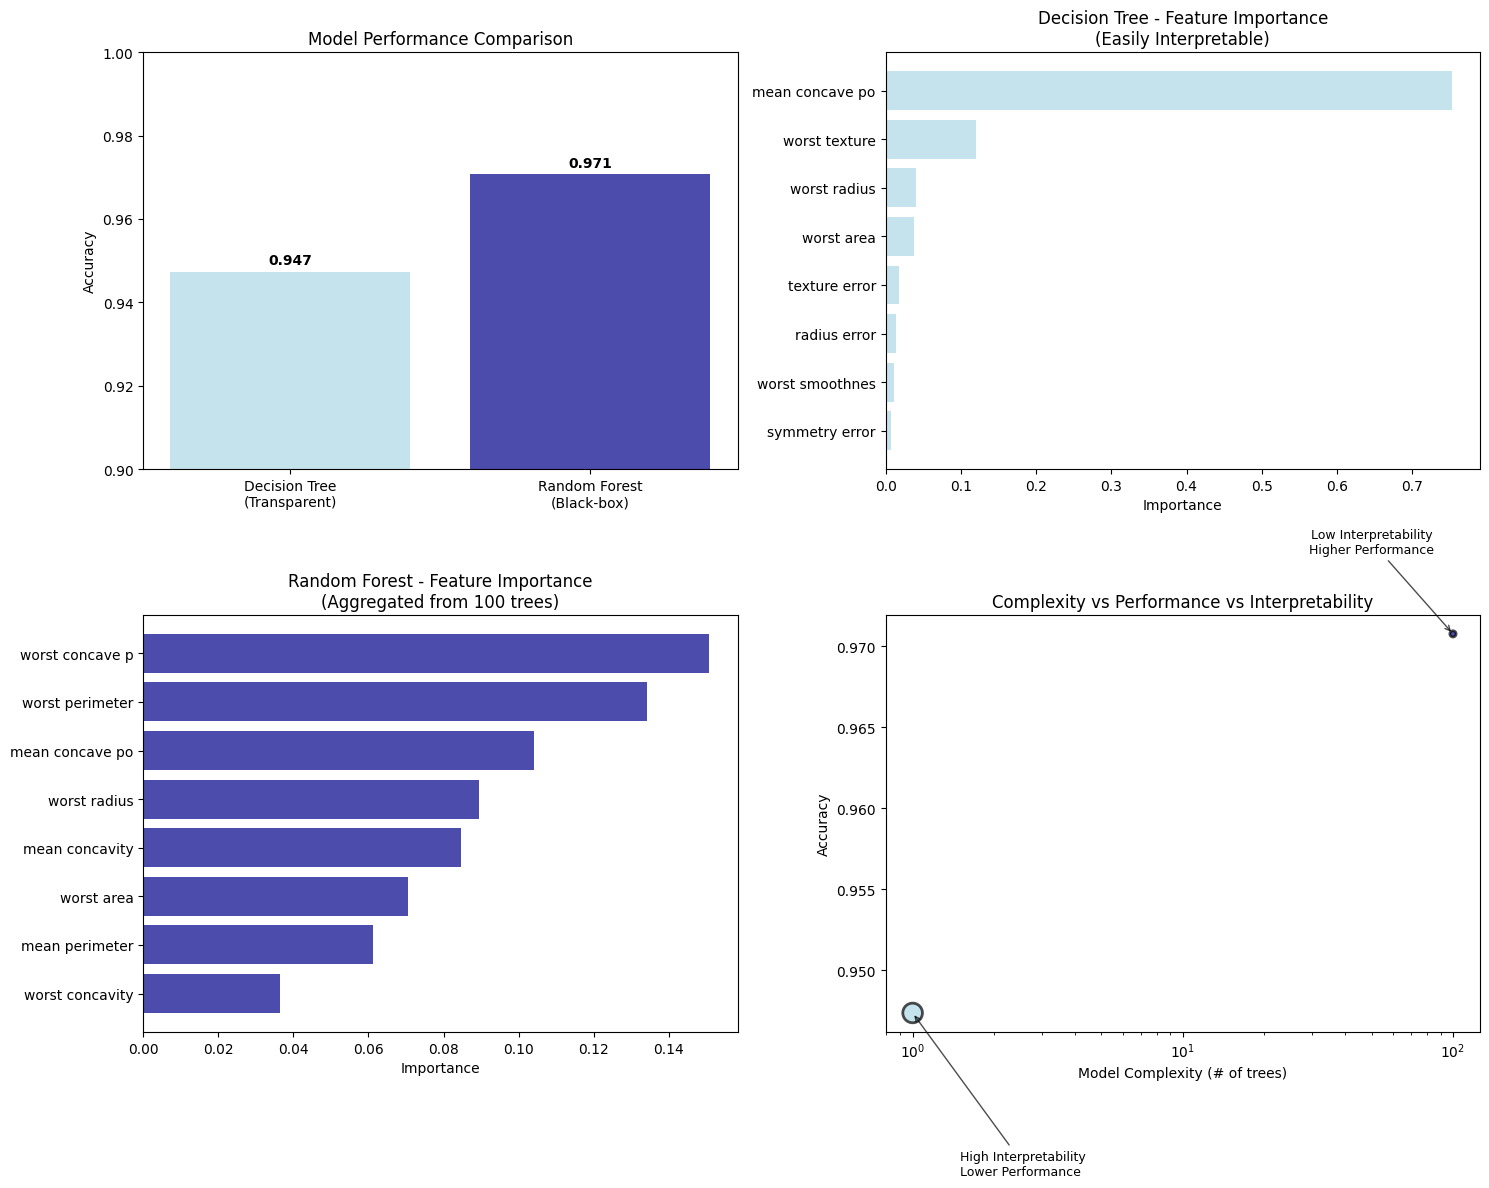


=== TRANSPARENCY vs BLACK-BOX TRADE-OFFS ===
Performance Gap: 2.3 percentage points
Interpretability: Decision Tree >> Random Forest
Feature Agreement: Only 3/10 features overlap in importance


In [22]:
# Visualization: Model Comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Accuracy Comparison
models = ['Decision Tree\n(Transparent)', 'Random Forest\n(Black-box)']
accuracies = [acc_tree, acc_forest]
colors = ['lightblue', 'darkblue']

ax1.bar(models, accuracies, color=colors, alpha=0.7)
ax1.set_ylabel('Accuracy')
ax1.set_title('Model Performance Comparison')
ax1.set_ylim([0.9, 1.0])
for i, v in enumerate(accuracies):
    ax1.text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Feature Importance - Decision Tree
top_tree_features = [f[0][:15] for f in tree_features_sorted[:8]]  # Truncate long names
top_tree_importance = [f[1] for f in tree_features_sorted[:8]]

ax2.barh(range(len(top_tree_features)), top_tree_importance, color='lightblue', alpha=0.7)
ax2.set_yticks(range(len(top_tree_features)))
ax2.set_yticklabels(top_tree_features)
ax2.set_xlabel('Importance')
ax2.set_title('Decision Tree - Feature Importance\n(Easily Interpretable)')
ax2.invert_yaxis()

# 3. Feature Importance - Random Forest  
top_forest_features = [f[0][:15] for f in forest_features_sorted[:8]]
top_forest_importance = [f[1] for f in forest_features_sorted[:8]]

ax3.barh(range(len(top_forest_features)), top_forest_importance, color='darkblue', alpha=0.7)
ax3.set_yticks(range(len(top_forest_features)))
ax3.set_yticklabels(top_forest_features)
ax3.set_xlabel('Importance')
ax3.set_title('Random Forest - Feature Importance\n(Aggregated from 100 trees)')
ax3.invert_yaxis()

# 4. Complexity vs Performance Trade-off
complexity = [1, 100]  # 1 tree vs 100 trees
performance = [acc_tree, acc_forest]
interpretability = [10, 1]  # Higher = more interpretable

ax4.scatter(complexity, performance, s=[i*20 for i in interpretability], 
           c=colors, alpha=0.7, edgecolors='black', linewidth=2)
ax4.set_xlabel('Model Complexity (# of trees)')
ax4.set_ylabel('Accuracy')
ax4.set_title('Complexity vs Performance vs Interpretability')
ax4.set_xscale('log')

# Add annotations
ax4.annotate('High Interpretability\nLower Performance', 
             xy=(1, acc_tree), xytext=(1.5, acc_tree-0.01),
             arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
             fontsize=9, ha='left')
ax4.annotate('Low Interpretability\nHigher Performance', 
             xy=(100, acc_forest), xytext=(50, acc_forest+0.005),
             arrowprops=dict(arrowstyle='->', color='black', alpha=0.7),
             fontsize=9, ha='center')

plt.tight_layout()
plt.show()

print("\n=== TRANSPARENCY vs BLACK-BOX TRADE-OFFS ===")
print(f"Performance Gap: {(acc_forest - acc_tree)*100:.1f} percentage points")
print(f"Interpretability: Decision Tree >> Random Forest")
print(f"Feature Agreement: Only {len(common_features)}/10 features overlap in importance")